In [1]:
import pandas as pd
import os
%pwd

u'/Users/Driz/capstone'

In [46]:
# import all the things!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, ExtraTreesClassifier, BaggingRegressor,BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingRegressor ,GradientBoostingClassifier
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

In [2]:
df = pd.read_csv('gender_included_df.csv', encoding='utf-8')

/Users/Driz/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4,5,6,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,normalized_text,word_count,gender
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",no actually it was a little of both sometimes ...,31.0,f
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,wheres mr bergstrom,3.0,f
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,i dont know although id sure like to talk to h...,22.0,f
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,that life is worth living,5.0,f
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,the polls will be open from now until the end ...,33.0,f


In [4]:
# create new df reducing to column for further preprocessing and my y-column

df_reduced = df[['normalized_text','gender']]
                
df_reduced.head()

,normalized_text,gender
0,no actually it was a little of both sometimes ...,f
1,wheres mr bergstrom,f
2,i dont know although id sure like to talk to h...,f
3,that life is worth living,f
4,the polls will be open from now until the end ...,f


In [5]:
df_reduced.dropna(inplace=True)

/Users/Driz/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [ ]:
# need to remove stop words
# import nltk
# from nltk.corpus import stopwords

# stop_words = nltk.corpus.stopwords.words('english')
# # stop_words = stopwords.words('english')
# filtered_sentence = [w for w in df_reduced['normalized_text'].values if not w in stop_words]
# #print filtered_sentence 

In [ ]:
# stop_words

In [18]:
df_reduced['gender'].value_counts()

m    68650
f    24042
Name: gender, dtype: int64

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(stop_words='english',
                       ngram_range=(1,3))
tfidf_matrix = tfidf.fit_transform(df_reduced['normalized_text'].values)


In [12]:
# due to failure of GridSearchCV decided to run tsvd for dimensionality reduction
# n_components=1000 was too much for my computer so I tried 100

from sklearn.decomposition import TruncatedSVD
tsvd = TruncatedSVD(n_components=700)

new_cols = tsvd.fit_transform(tfidf_matrix)
new_cols.shape

(92692, 700)

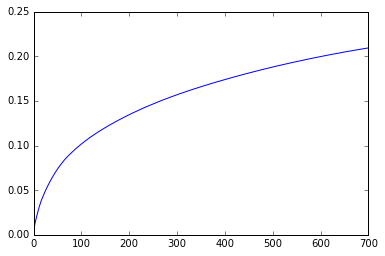

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.plot(np.cumsum(tsvd.explained_variance_ratio_))

In [20]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(df_reduced['gender'].values)

In [8]:
import numpy as np
np.mean(y)

0.74062486514478054

In [37]:
from sklearn.cross_validation import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix, y)

x_train, x_test, y_train, y_test = train_test_split(new_cols, y)

In [ ]:
# do label encoder before fed to train test

In [38]:
# these shapes pertain the filtered_sentence. there is discrepancy in the shape causing it to not work
# changed to df_reduced

# df_reduced.shape

new_cols.shape

(92692, 700)

In [39]:
# tfidf_matrix.shape

y.shape

(92692,)

In [ ]:
# len(filtered_sentence)

In [36]:
# created baseline

y.mean()

0.74062486514478054

In [40]:
from sklearn.ensemble import RandomForestClassifier
# max_features=0.75, max_leaf_nodes=10, max_depth=20, score=0.750000
# these params came from my stalled GridSearchCV below

# rf = RandomForestClassifier(max_features=0.75, max_leaf_nodes=10,
#                             max_depth=20, n_jobs=-1)
# rf.fit(x_train, y_train)
# predictions = rf.predict(x_test)
# rf.score(x_test, y_test)

rf = RandomForestClassifier(max_features=0.75, max_leaf_nodes=10,
                            max_depth=20, n_jobs=-1)
rf.fit(x_train, y_train)
predictions = rf.predict(x_test)
rf.score(x_test, y_test)

0.75018340309843357

In [81]:
print "Classification Report:\n", classification_report(y_test, predictions)

Classification Report:
             precision    recall  f1-score   support

          0       0.62      0.07      0.13      5958
          1       0.75      0.98      0.85     17215

avg / total       0.72      0.75      0.67     23173



In [41]:
# rf.score(predictions, y_test)
predictions.shape

(23173,)

In [42]:
y_test.shape

(23173,)

In [43]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
from sklearn.metrics import confusion_matrix
#import matplotlib.pyplot as plt --to make the fancy style confusion matrix

# confusion = pd.DataFrame(confusion_matrix(y_test, predictions), columns=['predicted_f', 'predicted_m'], index=['is_f', 'is_m'])
# confusion

,predicted_f,predicted_m
is_f,520,5530
is_m,352,16771


In [44]:
from sklearn.metrics import confusion_matrix

confusion = pd.DataFrame(confusion_matrix(y_test, predictions), columns=['predicted_f', 'predicted_m'], index=['is_f', 'is_m'])
confusion

,predicted_f,predicted_m
is_f,440,5518
is_m,271,16944


In [76]:
def tune_predictions(model, x_test, y_test, probability):
    predict = model.predict_proba(x_test)
    new_predictions = []
    for i in predict:
        if i[1] >= probability:
            new_predictions.append(1)
        else:
            new_predictions.append(0)
    print "Confusion Matrix:\n", confusion_matrix(y_test, new_predictions), "\n"
    print "Classification Report:\n", classification_report(y_test, new_predictions)

In [80]:
tune_predictions(rf, x_test,y_test, .75)
#stuff right over total of all observations --would be new model score
#minimizing one source of error to maximize some other 

Confusion Matrix:
[[ 2478  3480]
 [ 4208 13007]] 

Classification Report:
             precision    recall  f1-score   support

          0       0.37      0.42      0.39      5958
          1       0.79      0.76      0.77     17215

avg / total       0.68      0.67      0.67     23173



where to go from here could keep going with random forest, or try naive bayes

In [75]:
# throw tuned_predictions into confusion matrix

confusion = pd.DataFrame(confusion_matrix(y_test, tuned_predictions), columns=['predicted_f', 'predicted_m'], index=['is_f', 'is_m'])
confusion

,predicted_f,predicted_m
is_f,2478,3480
is_m,4208,13007


Looks like my model overly predicts male characters...

In [50]:
# try an ROC curve

from sklearn.metrics import roc_curve, auc

In [51]:
## plots ROC curve
def plot_roc(x_test, y_test, model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    roc_auc = auc(fpr, tpr)
    print 'ROC AUC: %0.2f' % roc_auc
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

ROC AUC: 0.62


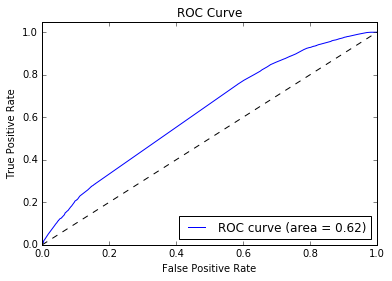

In [52]:
plot_roc(x_test, y_test, rf)

Need to run GridSearch over Random Forest model to determine hyperparams

In [64]:
predict = rf.predict_proba(x_test)

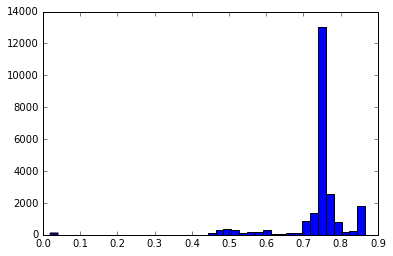

In [70]:
plt.hist(predict[:,1], bins=40);

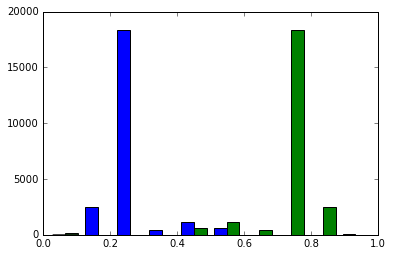

In [68]:
plt.hist(predict);

In [57]:
# try grid search to seek out some better params
# get rid of depths 150 & 200

params = {'max_depth' : [5, 20],
          'max_features' : [0.25, 0.75],
          'max_leaf_nodes' : [2,4,6]}

In [58]:
# try GridSearchCV on Random Forest

grid_search_random_forest = GridSearchCV(estimator=RandomForestClassifier(),
                                        param_grid=params, verbose=10)

rf_function = RandomForestClassifier()

grid_search_random_forest.fit(x_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_features=0.25, max_leaf_nodes=2, max_depth=5 ................
[CV]  max_features=0.25, max_leaf_nodes=2, max_depth=5, score=0.739870 -  14.5s
[CV] max_features=0.25, max_leaf_nodes=2, max_depth=5 ................


[Parallel(n_jobs=1)]: Done   1 tasks       | elapsed:   14.6s


[CV]  max_features=0.25, max_leaf_nodes=2, max_depth=5, score=0.739870 -  14.4s
[CV] max_features=0.25, max_leaf_nodes=2, max_depth=5 ................
[CV]  max_features=0.25, max_leaf_nodes=2, max_depth=5, score=0.739870 -  14.8s
[CV] max_features=0.25, max_leaf_nodes=4, max_depth=5 ................
[CV]  max_features=0.25, max_leaf_nodes=4, max_depth=5, score=0.744660 -  26.4s
[CV] max_features=0.25, max_leaf_nodes=4, max_depth=5 ................


[Parallel(n_jobs=1)]: Done   4 tasks       | elapsed:  1.2min


[CV]  max_features=0.25, max_leaf_nodes=4, max_depth=5, score=0.744228 -  26.2s
[CV] max_features=0.25, max_leaf_nodes=4, max_depth=5 ................
[CV]  max_features=0.25, max_leaf_nodes=4, max_depth=5, score=0.744056 -  23.2s
[CV] max_features=0.25, max_leaf_nodes=6, max_depth=5 ................
[CV]  max_features=0.25, max_leaf_nodes=6, max_depth=5, score=0.745393 -  33.2s
[CV] max_features=0.25, max_leaf_nodes=6, max_depth=5 ................


[Parallel(n_jobs=1)]: Done   7 tasks       | elapsed:  2.6min


[CV]  max_features=0.25, max_leaf_nodes=6, max_depth=5, score=0.744746 -  36.2s
[CV] max_features=0.25, max_leaf_nodes=6, max_depth=5 ................
[CV]  max_features=0.25, max_leaf_nodes=6, max_depth=5, score=0.744746 -  35.0s
[CV] max_features=0.75, max_leaf_nodes=2, max_depth=5 ................
[CV]  max_features=0.75, max_leaf_nodes=2, max_depth=5, score=0.739179 -  43.6s
[CV] max_features=0.75, max_leaf_nodes=2, max_depth=5 ................
[CV]  max_features=0.75, max_leaf_nodes=2, max_depth=5, score=0.739870 -  43.7s
[CV] max_features=0.75, max_leaf_nodes=2, max_depth=5 ................
[CV]  max_features=0.75, max_leaf_nodes=2, max_depth=5, score=0.739956 -  43.6s
[CV] max_features=0.75, max_leaf_nodes=4, max_depth=5 ................


[Parallel(n_jobs=1)]: Done  12 tasks       | elapsed:  5.9min


[CV]  max_features=0.75, max_leaf_nodes=4, max_depth=5, score=0.743624 - 1.4min
[CV] max_features=0.75, max_leaf_nodes=4, max_depth=5 ................
[CV]  max_features=0.75, max_leaf_nodes=4, max_depth=5, score=0.744746 - 1.4min
[CV] max_features=0.75, max_leaf_nodes=4, max_depth=5 ................
[CV]  max_features=0.75, max_leaf_nodes=4, max_depth=5, score=0.745221 - 1.3min
[CV] max_features=0.75, max_leaf_nodes=6, max_depth=5 ................
[CV]  max_features=0.75, max_leaf_nodes=6, max_depth=5, score=0.744573 - 2.0min
[CV] max_features=0.75, max_leaf_nodes=6, max_depth=5 ................
[CV]  max_features=0.75, max_leaf_nodes=6, max_depth=5, score=0.747853 - 2.0min
[CV] max_features=0.75, max_leaf_nodes=6, max_depth=5 ................


[Parallel(n_jobs=1)]: Done  17 tasks       | elapsed: 14.0min


[CV]  max_features=0.75, max_leaf_nodes=6, max_depth=5, score=0.744056 - 2.1min
[CV] max_features=0.25, max_leaf_nodes=2, max_depth=20 ...............
[CV]  max_features=0.25, max_leaf_nodes=2, max_depth=20, score=0.739870 -  14.8s
[CV] max_features=0.25, max_leaf_nodes=2, max_depth=20 ...............
[CV]  max_features=0.25, max_leaf_nodes=2, max_depth=20, score=0.739870 -  15.0s
[CV] max_features=0.25, max_leaf_nodes=2, max_depth=20 ...............
[CV]  max_features=0.25, max_leaf_nodes=2, max_depth=20, score=0.739870 -  14.6s
[CV] max_features=0.25, max_leaf_nodes=4, max_depth=20 ...............
[CV]  max_features=0.25, max_leaf_nodes=4, max_depth=20, score=0.741251 -  25.8s
[CV] max_features=0.25, max_leaf_nodes=4, max_depth=20 ...............
[CV]  max_features=0.25, max_leaf_nodes=4, max_depth=20, score=0.744703 -  26.7s
[CV] max_features=0.25, max_leaf_nodes=4, max_depth=20 ...............
[CV]  max_features=0.25, max_leaf_nodes=4, max_depth=20, score=0.744056 -  27.3s
[CV] max

[Parallel(n_jobs=1)]: Done  24 tasks       | elapsed: 18.2min


[CV]  max_features=0.25, max_leaf_nodes=6, max_depth=20, score=0.745652 -  35.5s
[CV] max_features=0.25, max_leaf_nodes=6, max_depth=20 ...............
[CV]  max_features=0.25, max_leaf_nodes=6, max_depth=20, score=0.744703 -  37.5s
[CV] max_features=0.25, max_leaf_nodes=6, max_depth=20 ...............
[CV]  max_features=0.25, max_leaf_nodes=6, max_depth=20, score=0.745091 -  31.8s
[CV] max_features=0.75, max_leaf_nodes=2, max_depth=20 ...............
[CV]  max_features=0.75, max_leaf_nodes=2, max_depth=20, score=0.739956 -  43.0s
[CV] max_features=0.75, max_leaf_nodes=2, max_depth=20 ...............
[CV]  max_features=0.75, max_leaf_nodes=2, max_depth=20, score=0.739913 -  43.2s
[CV] max_features=0.75, max_leaf_nodes=2, max_depth=20 ...............
[CV]  max_features=0.75, max_leaf_nodes=2, max_depth=20, score=0.744056 -  43.1s
[CV] max_features=0.75, max_leaf_nodes=4, max_depth=20 ...............
[CV]  max_features=0.75, max_leaf_nodes=4, max_depth=20, score=0.743883 - 1.4min
[CV] ma

[Parallel(n_jobs=1)]: Done  31 tasks       | elapsed: 23.5min


[CV]  max_features=0.75, max_leaf_nodes=4, max_depth=20, score=0.744703 - 1.4min
[CV] max_features=0.75, max_leaf_nodes=4, max_depth=20 ...............
[CV]  max_features=0.75, max_leaf_nodes=4, max_depth=20, score=0.744056 - 1.4min
[CV] max_features=0.75, max_leaf_nodes=6, max_depth=20 ...............
[CV]  max_features=0.75, max_leaf_nodes=6, max_depth=20, score=0.743495 - 2.0min
[CV] max_features=0.75, max_leaf_nodes=6, max_depth=20 ...............
[CV]  max_features=0.75, max_leaf_nodes=6, max_depth=20, score=0.744746 - 2.1min
[CV] max_features=0.75, max_leaf_nodes=6, max_depth=20 ...............
[CV]  max_features=0.75, max_leaf_nodes=6, max_depth=20, score=0.745350 - 2.0min


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 32.3min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [0.25, 0.75], 'max_leaf_nodes': [2, 4, 6], 'max_depth': [5, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=10)

In [ ]:
# grid_search_model = GridSearchCV(estimator=DecisionTreeRegressor(),
#                                  param_grid = params)

# decision_function = DecisionTreeRegressor()

# grid_search_model.fit(x_train, y_train)

In [59]:
# which params were optimal?
# looks like the best model went to a depth of 50 (not too many), used 9 features, had 2 leaf nodes(male or female),
# and used best split over random split

# grid_search_model.best_estimator_
grid_search_random_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=0.75, max_leaf_nodes=6,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
# ouch, thats atrocious! what a piece of junk model
# might abandon decision tree and move back to random forest

# grid_search_model.best_score_
grid_search_random_forest.best_score_

0.74549403760123134

In [ ]:
# shows how model got to its crappy predictions
# what would I sub for feature_names ????

# dot_data = StringIO()  
# export_graphviz(grid_search_model.best_estimator_, out_file=dot_data,  
#                 feature_names=feature_names,  
#                 filled=True, rounded=True,  
#                 special_characters=True)  
# graph = pydot.graph_from_dot_data(dot_data.getvalue())  
# Image(graph.create_png()) 

In [ ]:
grid_search_model.best_estimator_

In [ ]:
grid_search_model.fit

In [ ]:
grid_search_model.best_score_

In [ ]:
rf = RandomForestClassifier(n_jobs=-1)
et = ExtraTreesClassifier(n_jobs=-1)

In [ ]:
# want to build a global dict to store all my models for future use
global_models = {
            'rf': RandomForestClassifier(n_jobs=-1),
            'et': ExtraTreesClassifier(n_jobs=-1)
}    

In [ ]:
# comment out predictions line with test set

results = {}

def evaluate_model(x_train, y_train,
                  model):
    pick_a_model = global_models[model]
    pick_a_model.fit(x_train, y_train)
    print 'train model score:', pick_a_model.score(x_train, y_train)
#     predictions = pick_a_model.predict(x_test)
#     print '\nconfusion matrix: \n\n', confusion_matrix(y_test, predictions)
#     print '\nclassification report: \n\n', classification_report(y_test, predictions)
#     results.update({model: pick_a_model.score(X_test, y_test)})

In [ ]:
# looks like random forest is overfit, while extra trees could be a possible model!

for key in global_models:
    evaluate_model(x_train, y_train, key)

In [ ]:
# going to run et model on test data now to see how well it predicts 

results_final = {}

def evaluate_model_final(X_train, X_test, 
                         y_train, y_test,
                         model):
    pick_a_model = global_models[model]
    pick_a_model.fit(x_train, y_train)
    print 'test model score:', pick_a_model.score(x_test, y_test)
    predictions = pick_a_model.predict(x_test)
    print '\nconfusion matrix: \n\n', confusion_matrix(y_test, predictions)
    print '\nclassification report: \n\n', classification_report(y_test, predictions)
    results.update({model: pick_a_model.score(x_test, y_test)})

In [ ]:
# actually a test model set
for key in global_models:
    evaluate_model(x_test, y_test, key)

In [ ]:
# get baseline for model comparison

take # of lines spoken by female character divide # of total rows